In [173]:
# !pip install scikit-learn

In [174]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

In [175]:
df = pd.read_csv('./vehicles.csv')
df.head(8)

,Age,Gender,Income,Favorite Transport
0,5,female,NaN,bicycle
1,8,male,NaN,scooter
2,10,female,NaN,bicycle
3,14,male,NaN,metro
4,16,male,NaN,metro
5,18,female,NaN,metro
6,20,male,200.0,scooter
7,22,female,500.0,scooter


## Data Cleaning

In [176]:
df.isnull().sum()

Age                   0
Gender                0
Income                6
Favorite Transport    0
dtype: int64

In [177]:
df.dtypes

Age                     int64
Gender                 object
Income                float64
Favorite Transport     object
dtype: object

In [178]:
df['Income'].fillna(0.0, inplace=True)
df.head(8)

,Age,Gender,Income,Favorite Transport
0,5,female,0.0,bicycle
1,8,male,0.0,scooter
2,10,female,0.0,bicycle
3,14,male,0.0,metro
4,16,male,0.0,metro
5,18,female,0.0,metro
6,20,male,200.0,scooter
7,22,female,500.0,scooter


In [179]:
df.isnull().sum()

Age                   0
Gender                0
Income                0
Favorite Transport    0
dtype: int64

## Data Encoding

In [180]:
df['Gender'].unique()

array(['female', 'male'], dtype=object)

#### Option 1 `.replace(...)`

In [181]:
# df.replace({
#     'Gender': {
#         'male': 0,
#         'female': 1
#     }
# }, inplace=True)
# df.head()

#### Option 2 `LabelEncoder()`

In [182]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df.head()

,Age,Gender,Income,Favorite Transport
0,5,0,0.0,bicycle
1,8,1,0.0,scooter
2,10,0,0.0,bicycle
3,14,1,0.0,metro
4,16,1,0.0,metro


In [183]:
df.dtypes

Age                     int64
Gender                  int32
Income                float64
Favorite Transport     object
dtype: object

## Modeling

#### X - training input samples

In [184]:
X = df.drop(columns='Favorite Transport')
X.head()

,Age,Gender,Income
0,5,0,0.0
1,8,1,0.0
2,10,0,0.0
3,14,1,0.0
4,16,1,0.0


#### y - target values

In [185]:
y = df['Favorite Transport']
y.head()

0    bicycle
1    scooter
2    bicycle
3      metro
4      metro
Name: Favorite Transport, dtype: object

In [186]:
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier()

## Prediction

In [187]:
test_df = pd.DataFrame({
    'Age': [12, 30, 75],
    'Gender': [0, 0, 1],
    'Income': [0.0, 4000, 50000],
})
test_df

,Age,Gender,Income
0,12,0,0.0
1,30,0,4000.0
2,75,1,50000.0


In [188]:
model.predict(test_df)

array(['bicycle', 'car', 'helicopter'], dtype=object)

## Evaluation

In [189]:
# train_test_split
# accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
[X_train.shape, X_test.shape, y_train.shape, y_test.shape]

[(20, 3), (6, 3), (20,), (6,)]

In [190]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [191]:
X_test

,Age,Gender,Income
2,10,0,0.0
14,45,1,3000.0
3,14,1,0.0
9,25,0,800.0
19,57,1,4000.0
21,64,1,6500.0


In [192]:
predictions = model.predict(X_test)
predictions

array(['scooter', 'car', 'metro', 'scooter', 'car', 'helicopter'],
      dtype=object)

In [193]:
model_score = accuracy_score(y_test, predictions)
model_score

0.3333333333333333

## Exporting to the DOT file

In [194]:
tree.export_graphviz(
    model,
    out_file='decision_tree_model.dot',
    feature_names=['Age', 'Gender', 'Income'],
    filled=True,
    class_names=sorted(y.unique())
)

## Charts

In [198]:
df.replace({
    'Gender': {
        0: 'male',
        1: 'female'
    }
}, inplace=True)
df.head()

,Age,Gender,Income,Favorite Transport
0,5,male,0.0,bicycle
1,8,female,0.0,scooter
2,10,male,0.0,bicycle
3,14,female,0.0,metro
4,16,female,0.0,metro


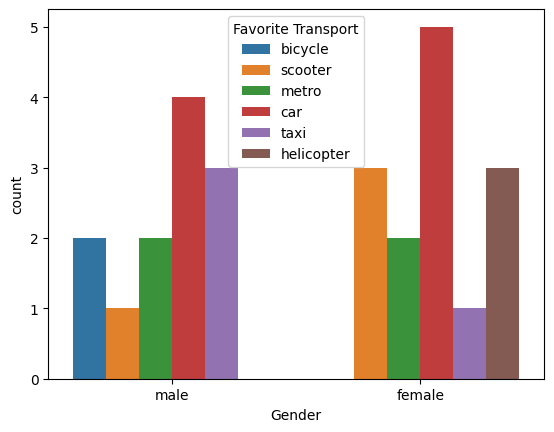

In [199]:
sns.countplot(x=df['Gender'], hue=df['Favorite Transport'])
plt.show()

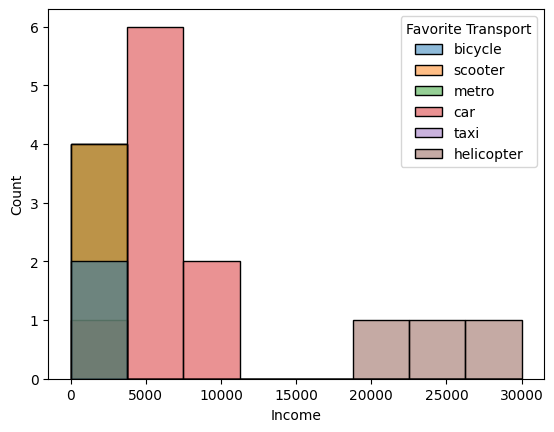

In [200]:
sns.histplot(x=df['Income'], hue=df['Favorite Transport'])
plt.show()